# 6.4 (random generator with gaussian distribution)

In [ ]:
using LinearAlgebra
using Plots
using Colors
using Statistics
using Polynomials
gr()

First we check the built in random generator to make sure it generates numbers with an equal probability between zero and one.

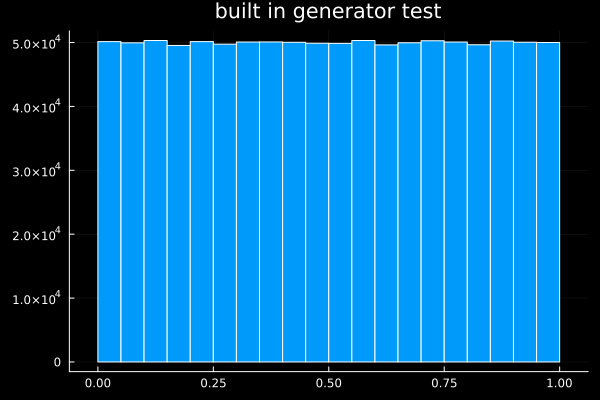

In [5]:
randcheck = []
for i in 1:1000000
    push!(randcheck, rand())
end
histogram(randcheck, background = :black, title = "built in generator test", legend = false, bins = 40)

The generator seems fine so we continue

From the textbook, we have the following equations: <br>  <br>
$g_\rho(\rho) = \frac{1}{\sigma^2} e^{-\frac{\rho^2}{2 \sigma^2}} \rho$ <br>  <br>
$g_\theta(\theta) = \frac{1}{2 \pi}$  <br>  <br>
By integrating these functions and using the same procedure we have: <br> <br>
$\rho = \sqrt{-2 ln(x_1) \sigma^2}$ <br> <br>
$\theta = 2 \pi x_2$ <br> <br>
So since $y_1 = \rho \cos (\theta)$ has a gaussian distribution, then the formula we have to apply is as follows: <br> <br>
$y = \sqrt{2 ln(x_1) \sigma^2} \times \cos (2 \pi x_2)$

Function that generates one random number with a gaussian distribution using the discussed method. ($\sigma$ is taken as an input)

In [ ]:
function gaussianRandomGenerator(sigma)
    x_1 = rand()
    x_2 = rand()
    y = sqrt(-2 * log(x_1) * sigma^2) * cos(2 * pi * x_2)
    return y
end

Now we check the new random generator using the same method as before and we also fit a theoretical gaussian curve on top. (for $\sigma$ = 1)

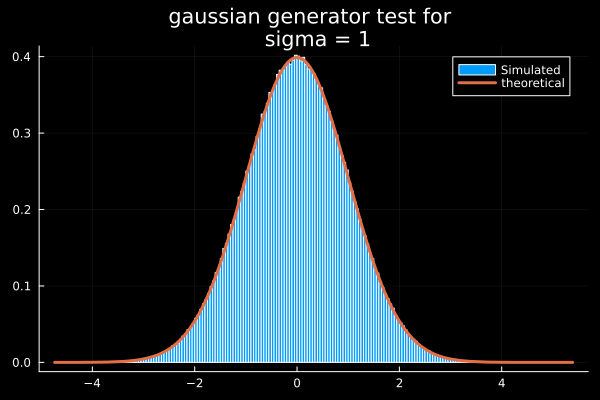

In [19]:
gaussianRandomCheck = []
for i in 1:1000000
    push!(gaussianRandomCheck, gaussianRandomGenerator(1))
end
p(x) = 1/sqrt(2pi) * exp(-x^2/2) #theoretical gaussian curve for sigma = 1
histogram(gaussianRandomCheck, background = :black, title = "gaussian generator test for \n sigma = 1", bins = 200, normalize = :pdf, label = "Simulated")
plot!(p, label = "theoretical", lw = 3)